
<a id='growth-in-dles'></a>
<div id="qe-notebook-header" align="right" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" width="250px" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>


<a id='index-0'></a>

# Growth in Dynamic Linear Economies

## Contents

- [Growth in Dynamic Linear Economies](#Growth-in-Dynamic-Linear-Economies)  
  - [Common Structure](#Common-Structure)  
  - [A Planning Problem](#A-Planning-Problem)  
  - [Example Economies](#Example-Economies)  

**Co-author:** Sebastian Graves

This is another member of a suite of lectures that use the quantecon DLE class to instantiate models within the
[[HS13b]](https://lectures.quantecon.org/py/zreferences.html#hs2013) class of models described in detail in [Recursive Models of Dynamic Linear Economies](https://lectures.quantecon.org/py/hs_recursive_models.html)

In addition to what’s included in  Anaconda, this lecture uses the quantecon  library

In [1]:
!pip install quantecon

This lecture describes several complete market economies having a
common linear-quadratic-Gaussian structure

Three examples of such economies show how the DLE class can be used to
compute equilibria of such economies in Python and to illustrate how
different versions of these economies can or cannot generate sustained
growth

We require the following imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from quantecon import LQ
from quantecon import DLE
%matplotlib inline

## Common Structure

Our example economies have the following features

- Information flows are governed by an exogenous stochastic process
  $ z_t $ that follows  
  $$
  z_{t+1} = A_{22}z_t + C_2w_{t+1}
  $$
  where $ w_{t+1} $ is a martingale difference sequence  
- Preference shocks $ b_t $ and technology shocks $ d_t $ are
  linear functions of $ z_t $  
  $$
  b_t = U_bz_t
  $$
  $$
  d_t = U_dz_t
  $$
- Consumption and physical investment goods are produced using the
  following technology  
  $$
  \Phi_c c_t + \Phi_g g_t + \Phi_i i_t = \Gamma k_{t-1} + d_t
  $$
  $$
  k_t = \Delta_k k_{t-1} + \Theta_k i_t
  $$
  $$
  g_t \cdot g_t = l_t^2
  $$
  where $ c_t $ is a vector of consumption goods, $ g_t $ is a
  vector of intermediate goods, $ i_t $ is a vector of investment
  goods, $ k_t $ is a vector of physical capital goods, and
  $ l_t $ is the amount of labour supplied by the representative
  household  
- Preferences of a representative household are described by  
  $$
  - \frac{1}{2}\mathbb{E}\sum_{t=0}^\infty \beta^t [(s_t-b_t)\cdot(s_t - b_t) + l_t^2], 0 < \beta < 1
  $$
  $$
  s_t = \Lambda h_{t-1} + \Pi c_t
  $$
  $$
  h_t = \Delta_h h_{t-1} + \Theta_h c_t
  $$
  where $ s_t $ is a vector of consumption services, and
  $ h_t $ is a vector of household capital stocks  


Thus, an instance of this class of economies is described by the
matrices

$$
\{ A_{22}, C_2, U_b, U_d, \Phi_c, \Phi_g, \Phi_i, \Gamma, \Delta_k, \Theta_k,\Lambda, \Pi, \Delta_h, \Theta_h \}
$$

and the scalar $ \beta $

## A Planning Problem

The first welfare theorem asserts that a competitive equilibrium
allocation solves the following planning problem

Choose $ \{c_t, s_t, i_t, h_t, k_t, g_t\}_{t=0}^\infty $ to maximise

> $$
- \frac{1}{2}\mathbb{E}\sum_{t=0}^\infty \beta^t [(s_t-b_t)\cdot(s_t - b_t) + g_t \cdot g_t]
$$


subject to the linear constraints

$$
\Phi_c c_t + \Phi_g g_t + \Phi_i i_t = \Gamma k_{t-1} + d_t
$$

$$
k_t = \Delta_k k_{t-1} + \Theta_k i_t
$$

$$
h_t = \Delta_h h_{t-1} + \Theta_h c_t
$$

$$
s_t = \Lambda h_{t-1} + \Pi c_t
$$

and

$$
z_{t+1} = A_{22}z_t + C_2w_{t+1}
$$

$$
b_t = U_bz_t
$$

$$
d_t = U_dz_t
$$

The DLE class in Python maps this planning problem into a linear
quadratic dynamic programming problem and then solves it by using
QuantEcon’s LQ class

(See Section 5.5 of Hansen & Sargent (2013) [[HS13b]](https://lectures.quantecon.org/py/zreferences.html#hs2013) for a full
description of how to map these economies into an LQ setting, and how to
use the solution to the LQ problem to construct the output matrices in
order to simulate the economies)

The state for the LQ problem is

$$
x_t =
\left[ {\begin{array}{c}
h_{t-1} \\ k_{t-1} \\ z_t
\end{array} }
\right]
$$

and the control variable is $ u_t = i_t $

Once the LQ problem has been solved, the law of motion for the state is

$$
x_{t+1} = (A-BF)x_t + Cw_{t+1}
$$

where the optimal control law is $ u_t = -Fx_t $

Letting $ A^o = A-BF $ we write this law of motion as

$$
x_{t+1} = A^ox_t + Cw_{t+1}
$$

## Example Economies

Each of the example economies shown here will share a number of
components. In particular, for each we will consider preferences of the
form

$$
- \frac{1}{2}\mathbb{E}\sum_{t=0}^\infty \beta^t [(s_t-b_t)^2 + l_t^2], 0 < \beta < 1
$$

$$
s_t = \lambda h_{t-1} + \pi c_t
$$

$$
h_t = \delta_h h_{t-1} + \theta_h c_t
$$

$$
b_t = U_bz_t
$$

Technology of the form

$$
c_t + i_t = \gamma_1 k_{t-1} + d_{1t}
$$

$$
k_t = \delta_k k_{t-1} + i_t
$$

$$
g_t = \phi_1 i_t \, , \phi_1 > 0
$$

$$
\left[ {\begin{array}{c}
  d_{1t} \\ 0
  \end{array} }
  \right] = U_dz_t
$$

And information of the form

$$
z_{t+1} =
\left[ {\begin{array}{ccc}
   1 & 0 & 0 \\ 0 & 0.8 & 0 \\ 0 & 0 & 0.5
   \end{array} }
   \right]
   z_t +
    \left[ {\begin{array}{cc}
   0 & 0 \\ 1 & 0 \\ 0 & 1
   \end{array} }
   \right]
   w_{t+1}
$$

$$
U_b =
  \left[ {\begin{array}{ccc}
  30 & 0 & 0
  \end{array} }
  \right]
$$

$$
U_d =
   \left[ {\begin{array}{ccc}
   5 & 1 & 0 \\ 0 & 0 & 0
   \end{array} }
   \right]
$$

We shall vary
$ \{\lambda, \pi, \delta_h, \theta_h, \gamma_1, \delta_k, \phi_1\} $
and the initial state $ x_0 $ across the three economies

### Example 1: Hall (1978)

First, we set parameters such that consumption follows a random walk. In
particular, we set

$$
\lambda = 0, \pi = 1, \gamma_1 = 0.1, \phi_1 = 0.00001, \delta_k = 0.95, \beta = \frac{1}{1.05}
$$

(In this economy $ \delta_h $ and $ \theta_h $ are arbitrary as
household capital does not enter the equation for consumption services
We set them to values that will become useful in Example 3)

It is worth noting that this choice of parameter values ensures that
$ \beta(\gamma_1 + \delta_k) = 1 $

For simulations of this economy, we choose an initial condition of

$$
x_0 =
   \left[ {\begin{array}{ccccc}
   5 & 150 & 1 & 0 & 0
   \end{array} }
   \right]'
$$

In [3]:
# Parameter Matrices
γ_1 = 0.1
ϕ_1 = 1e-5

ϕ_c, ϕ_g, ϕ_i, γ, δ_k, θ_k = (np.array([[1], [0]]),
                              np.array([[0], [1]]),
                              np.array([[1], [-ϕ_1]]),
                              np.array([[γ_1], [0]]),
                              np.array([[.95]]),
                              np.array([[1]]))

β, l_λ, π_h, δ_h, θ_h = (np.array([[1 / 1.05]]),
                         np.array([[0]]),
                         np.array([[1]]),
                         np.array([[.9]]),
                         np.array([[1]]) - np.array([[.9]]))

a22, c2, ub, ud = (np.array([[1,   0,   0],
                             [0, 0.8,   0],
                             [0,   0, 0.5]]),
                   np.array([[0, 0],
                             [1, 0],
                             [0, 1]]),
                   np.array([[30, 0, 0]]),
                   np.array([[5, 1, 0],
                             [0, 0, 0]]))

# Initial condition
x0 = np.array([[5], [150], [1], [0], [0]])

Info1 = (a22, c2, ub, ud)
Tech1 = (ϕ_c, ϕ_g, ϕ_i, γ, δ_k, θ_k)
Pref1 = (β, l_λ, π_h, δ_h, θ_h)

These parameter values are used to define an economy of the DLE class

In [4]:
Econ1 = DLE(Info1, Tech1, Pref1)

We can then simulate the economy for a chosen length of time, from our
initial state vector $ x_0 $

In [5]:
Econ1.compute_sequence(x0, ts_length=300)

The economy stores the simulated values for each variable. Below we plot
consumption and investment

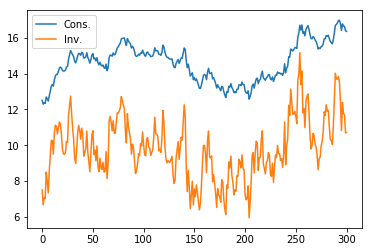

In [6]:
# This is the right panel of Fig 5.7.1 from p.105 of HS2013
plt.plot(Econ1.c[0], label='Cons.')
plt.plot(Econ1.i[0], label='Inv.')
plt.legend()
plt.show()

Inspection of the plot shows that the sample paths of consumption and
investment drift in ways that suggest that each has or nearly has a
**random walk** or **unit root** component

This is confirmed by checking the eigenvalues of $ A^o $

In [7]:
Econ1.endo, Econ1.exo

(array([0.9, 1. ]), array([1. , 0.8, 0.5]))

The endogenous eigenvalue that appears to be unity reflects the random
walk character of consumption in Hall’s model

- Actually, the largest endogenous eigenvalue is very slightly below 1  
- This outcome comes from the small adjustment cost $ \phi_1 $  

In [8]:
Econ1.endo[1]

0.9999999999904767

The fact that the largest endogenous eigenvalue is strictly less than
unity in modulus means that it is possible to compute the non-stochastic
steady state of consumption, investment and capital

In [9]:
Econ1.compute_steadystate()
np.set_printoptions(precision=3, suppress=True)
print(Econ1.css, Econ1.iss, Econ1.kss)

[[4.999]] [[-0.001]] [[-0.021]]


However, the near-unity endogenous eigenvalue means that these steady
state values are of little relevance

### Example 2: Altered growth condition

We generate our next economy by making two alterations to the parameters
of Example 1

- First, we raise $ \phi_1 $ from 0.00001 to 1  
  - This will lower the endogenous eigenvalue that is close to 1,
    causing the economy to head more quickly to the vicinity of its
    non-stochastic steady-state  
- Second, we raise $ \gamma_1 $ from 0.1 to 0.15  
  - This has the effect of raising the optimal steady-state value of
    capital  


We also start the economy off from an initial condition with a lower
capital stock

$$
x_0 =
   \left[ {\begin{array}{ccccc}
   5 & 20 & 1 & 0 & 0
   \end{array} }
   \right]'
$$

Therefore, we need to define the following new parameters

In [10]:
γ2 = 0.15
γ22 = np.array([[γ2], [0]])

ϕ_12 = 1
ϕ_i2 = np.array([[1], [-ϕ_12]])

Tech2 = (ϕ_c, ϕ_g, ϕ_i2, γ22, δ_k, θ_k)

x02 = np.array([[5], [20], [1], [0], [0]])

Creating the DLE class and then simulating gives the following plot for
consumption and investment

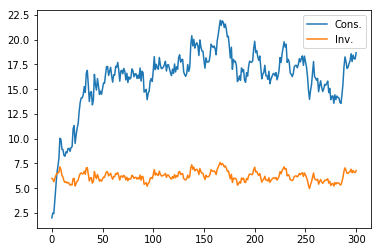

In [11]:
Econ2 = DLE(Info1, Tech2, Pref1)

Econ2.compute_sequence(x02, ts_length=300)

plt.plot(Econ2.c[0], label='Cons.')
plt.plot(Econ2.i[0], label='Inv.')
plt.legend()
plt.show()

Simulating our new economy shows that consumption grows quickly in the
early stages of the sample

However, it then settles down around the new non-stochastic steady-state
level of consumption of 17.5, which we find as follows

In [12]:
Econ2.compute_steadystate()
print(Econ2.css, Econ2.iss, Econ2.kss)

[[17.5]] [[6.25]] [[125.]]


The economy converges faster to this level than in Example 1 because the
largest endogenous eigenvalue of $ A^o $ is now significantly lower
than 1

In [13]:
Econ2.endo, Econ2.exo

(array([0.9  , 0.952]), array([1. , 0.8, 0.5]))

### Example 3: A Jones-Manuelli (1990) Economy

For our third economy, we choose parameter values with the aim of
generating *sustained* growth in consumption, investment and capital

To do this, we set parameters so that Jones and Manuelli’s “growth
condition” is just satisfied

In our notation, just satisfying the growth condition is actually
equivalent to setting $ \beta(\gamma_1 + \delta_k) = 1 $, the
condition that was necessary for consumption to be a random walk in
Hall’s model

Thus, we lower $ \gamma_1 $ back to 0.1

In our model, this is a necessary but not sufficient condition for
growth

To generate growth we set preference parameters to reflect habit
persistence

In particular, we set $ \lambda = -1 $, $ \delta_h = 0.9 $ and
$ \theta_h = 1 - \delta_h = 0.1 $

This makes preferences assume the form

$$
- \frac{1}{2}\mathbb{E}\sum_{t=0}^\infty \beta^t [(c_t-b_t - (1-\delta_h)\sum_{j=0}^\infty \delta_h^jc_{t-j-1})^2 + l_t^2]
$$

These preferences reflect habit persistence

- the effective “bliss point”
  $ b_t + (1-\delta_h)\sum_{j=0}^\infty \delta_h^jc_{t-j-1} $ now
  shifts in response to a moving average of past consumption  


Since $ \delta_h $ and $ \theta_h $ were defined earlier, the
only change we need to make from the parameters of Example 1 is to
define the new value of $ \lambda $

In [14]:
l_λ2 = np.array([[-1]])
Pref2 = (β, l_λ2, π_h, δ_h, θ_h)

In [15]:
Econ3 = DLE(Info1, Tech1, Pref2)

We simulate this economy from the original state vector

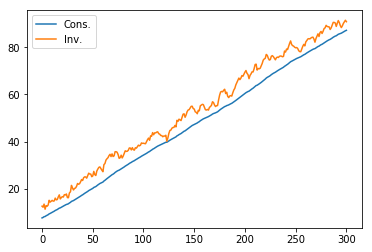

In [16]:
Econ3.compute_sequence(x0, ts_length=300)

# This is the right panel of Fig 5.10.1 from p.110 of HS2013
plt.plot(Econ3.c[0], label='Cons.')
plt.plot(Econ3.i[0], label='Inv.')
plt.legend()
plt.show()

Thus, adding habit persistence to the Hall model of Example 1 is enough
to generate sustained growth in our economy

The eigenvalues of
$ A^o $ in this new economy are

In [17]:
Econ3.endo, Econ3.exo

(array([1.+0.j, 1.-0.j]), array([1. , 0.8, 0.5]))

We now have two unit endogenous eigenvalues. One stems from satisfying
the growth condition (as in Example 1)

The other unit eigenvalue results from setting $ \lambda = -1 $

To show the importance of both of these for generating growth, we
consider the following experiments

### Example 3.1: Raise $ \lambda $ to -0.7

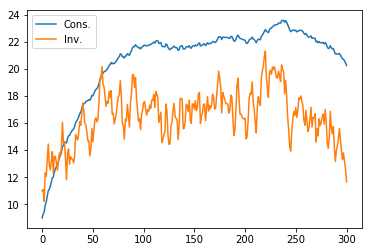

In [18]:
l_λ3 = np.array([[-0.7]])
Pref3 = (β, l_λ3, π_h, δ_h, θ_h)

Econ4 = DLE(Info1, Tech1, Pref3)

Econ4.compute_sequence(x0, ts_length=300)

plt.plot(Econ4.c[0], label='Cons.')
plt.plot(Econ4.i[0], label='Inv.')
plt.legend()
plt.show()

We no longer achieve sustained growth if $ \lambda $ is raised from -1 to -0.7

This is related to the fact that one of the endogenous
eigenvalues is now less than 1

In [19]:
Econ4.endo, Econ4.exo

(array([0.97, 1.  ]), array([1. , 0.8, 0.5]))

### Example 3.2: Lower $ \beta $ to 0.94

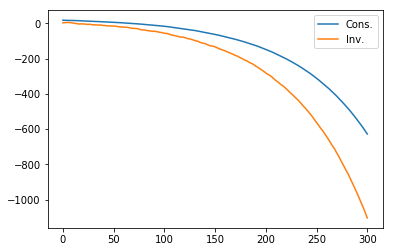

In [20]:
β_2 = np.array([[0.94]])
Pref4 = (β_2, l_λ, π_h, δ_h, θ_h)

Econ5 = DLE(Info1, Tech1, Pref4)

Econ5.compute_sequence(x0, ts_length=300)

plt.plot(Econ5.c[0], label='Cons.')
plt.plot(Econ5.i[0], label='Inv.')
plt.legend()
plt.show()

Growth also fails if we lower $ \beta $, since we now have
$ \beta(\gamma_1 + \delta_k) < 1 $

Consumption and investment explode downwards, as a lower value of
$ \beta $ causes the representative consumer to front-load
consumption

This explosive path shows up in the second endogeous eigenvalue now
being larger than one

In [21]:
Econ5.endo, Econ5.exo

(array([0.9  , 1.013]), array([1. , 0.8, 0.5]))